# Car Price Prediction 🚗 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("CarPrice.csv")
df.drop(columns = ["car_ID"], inplace = True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
df_train.shape

(143, 25)

In [6]:
df_train

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
177,-1,toyota mark ii,gas,std,four,hatchback,fwd,front,102.4,175.6,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,11248.0
75,1,mercury cougar,gas,turbo,two,hatchback,rwd,front,102.7,178.4,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0
174,-1,toyota celica gt,diesel,turbo,four,sedan,fwd,front,102.4,175.6,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698.0
31,2,honda civic cvcc,gas,std,two,hatchback,fwd,front,86.6,144.6,...,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855.0
12,0,bmw x1,gas,std,two,sedan,rwd,front,101.2,176.8,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,nissan clipper,gas,std,two,hatchback,rwd,front,99.2,178.5,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399.0
14,1,bmw z4,gas,std,four,sedan,rwd,front,103.5,189.0,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.0
92,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,165.3,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6849.0
179,3,toyota corona,gas,std,two,hatchback,rwd,front,102.9,183.5,...,171,mpfi,3.27,3.35,9.3,161,5200,19,24,15998.0


In [7]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [8]:
# df_test.isna().sum()
df_train['enginetype'].unique()

array(['ohc', 'dohc', 'ohcf', 'l', 'ohcv', 'rotor', 'dohcv'], dtype=object)

In [ ]:
sb.pairplot(df_train, hue="price")
plt.show()

Text(0, 0.5, 'Count of Cars')

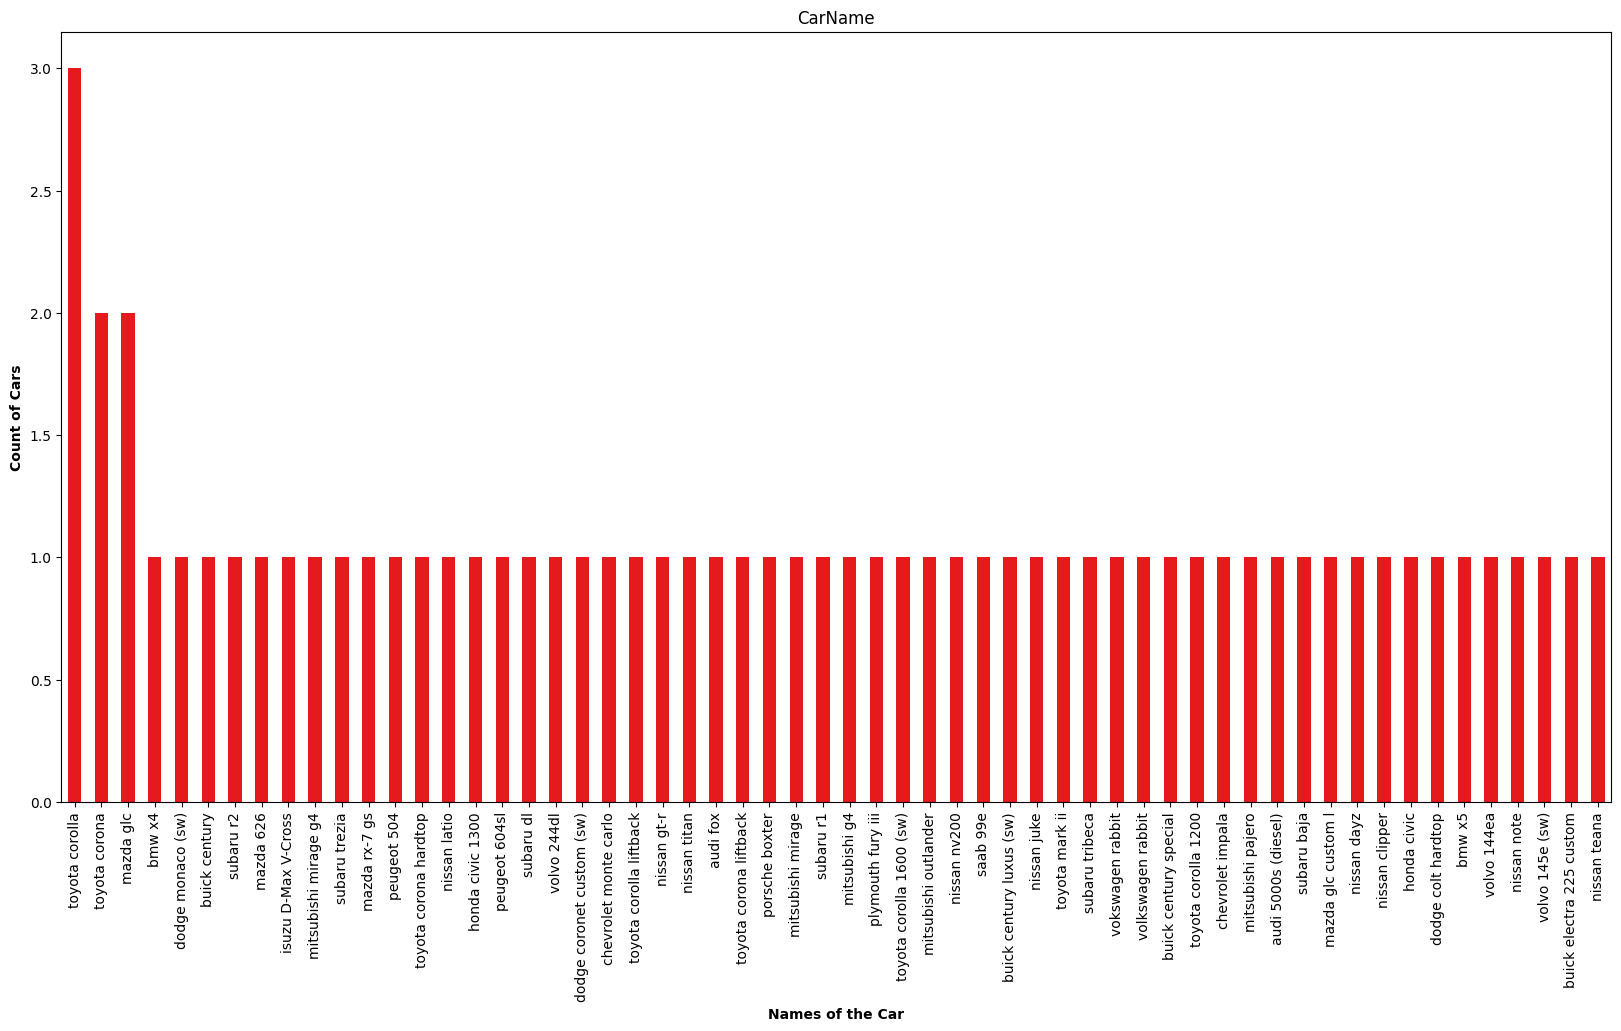

In [17]:
# Count of cars
plt.rcParams['figure.figsize'] = [20,10]
ax=df_test['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

C:\Users\71524\AppData\Local\Temp\ipykernel_14280\353064487.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['price'])


<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

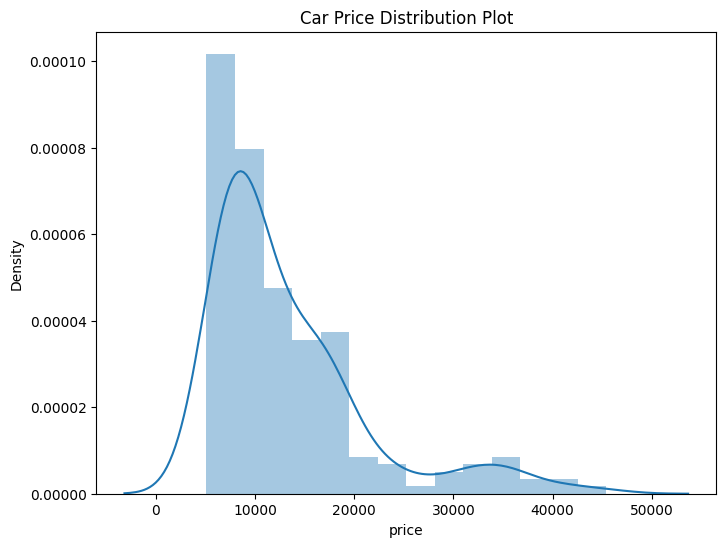

In [19]:
# Car price distribution
plt.figure(figsize=(8,6))
plt.title('Car Price Distribution Plot')
sb.distplot(df['price'])

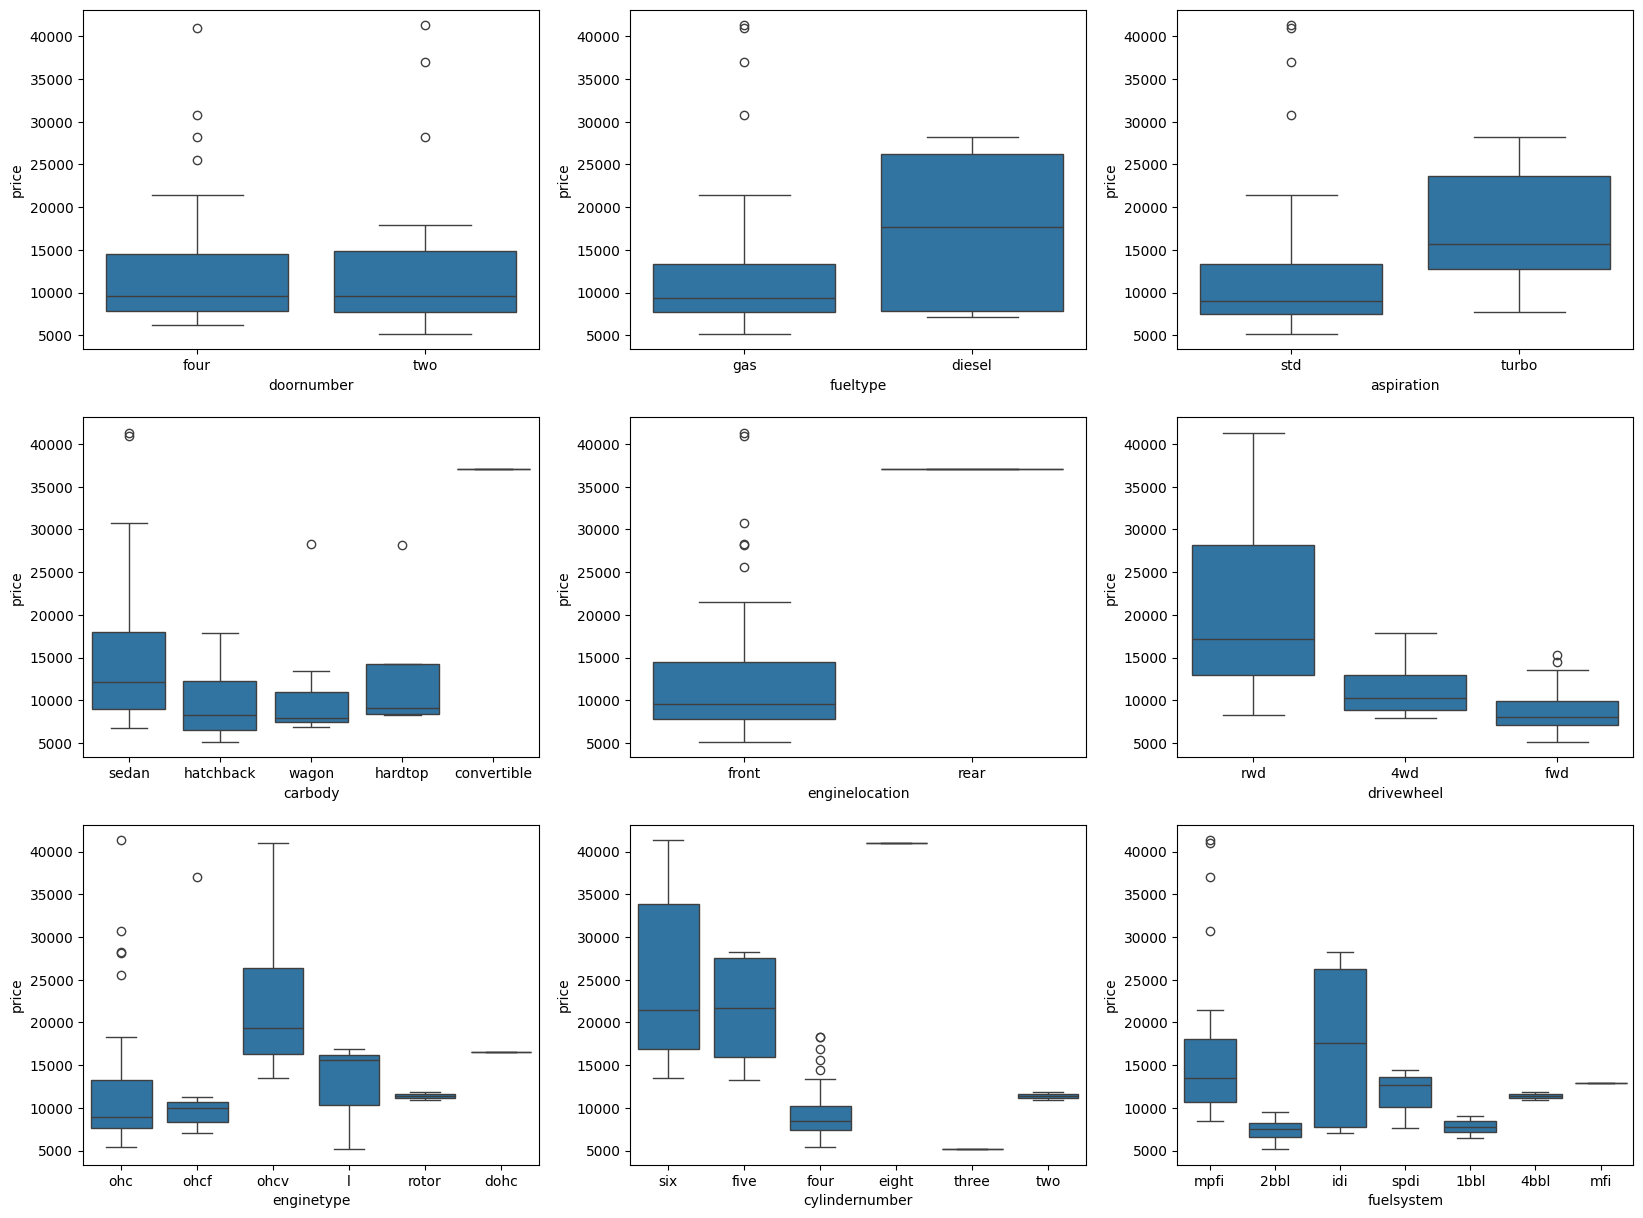

In [22]:
# Box plots of different categorical columns
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sb.boxplot(x = 'doornumber', y = 'price', data = df_test)
plt.subplot(3,3,2)
sb.boxplot(x = 'fueltype', y = 'price', data = df_test)
plt.subplot(3,3,3)
sb.boxplot(x = 'aspiration', y = 'price', data = df_test)
plt.subplot(3,3,4)
sb.boxplot(x = 'carbody', y = 'price', data = df_test)
plt.subplot(3,3,5)
sb.boxplot(x = 'enginelocation', y = 'price', data = df_test)
plt.subplot(3,3,6)
sb.boxplot(x = 'drivewheel', y = 'price', data = df_test)
plt.subplot(3,3,7)
sb.boxplot(x = 'enginetype', y = 'price', data = df_test)
plt.subplot(3,3,8)
sb.boxplot(x = 'cylindernumber', y = 'price', data = df_test)
plt.subplot(3,3,9)
sb.boxplot(x = 'fuelsystem', y = 'price', data = df_test)
plt.show()

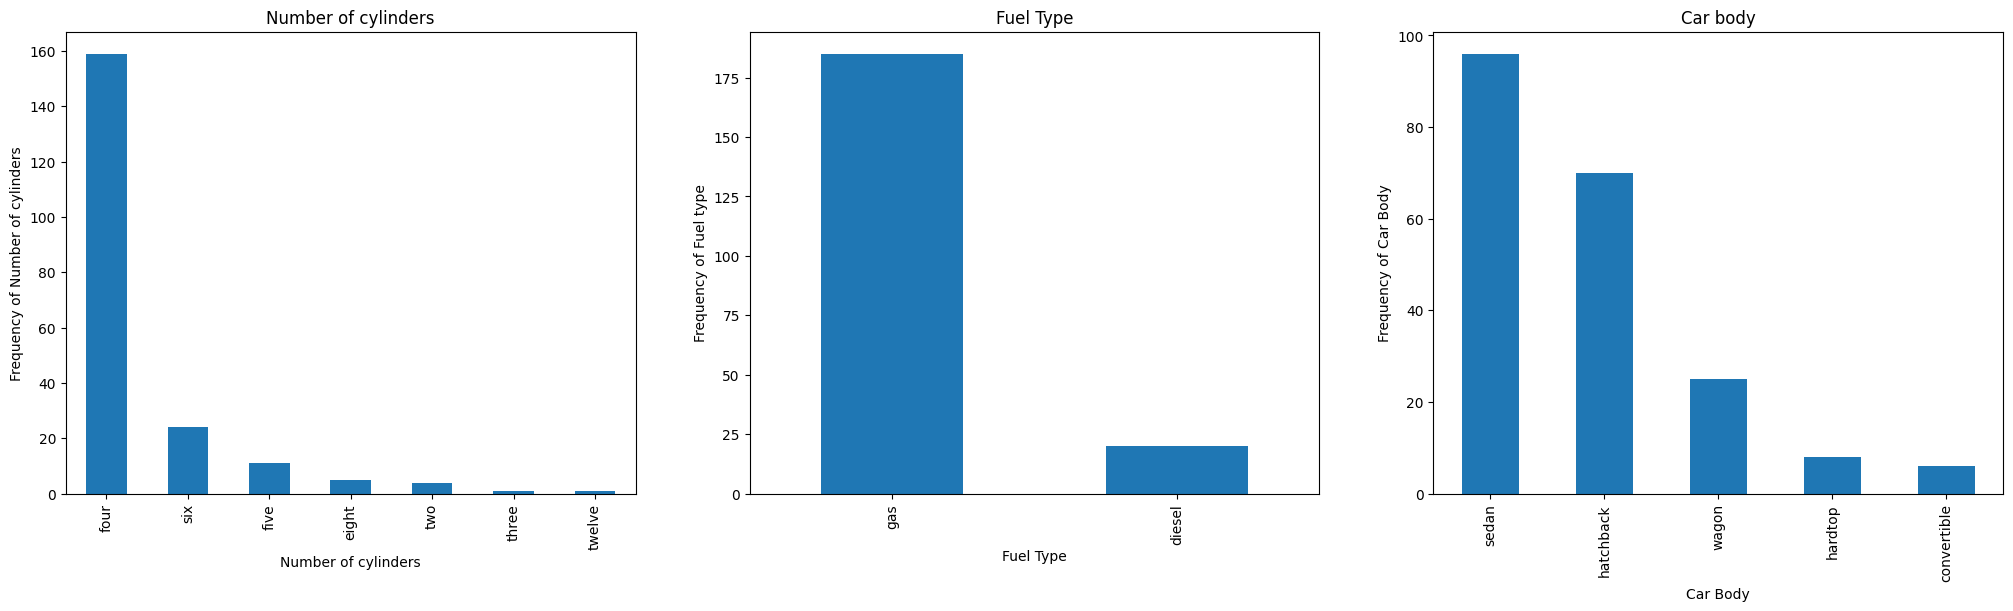

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
plt1 = df['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel='Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1, 3, 2)
plt1 = df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1, 3, 3)
plt1 = df['carbody'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel='Car Body', ylabel='Frequency of Car Body')

plt.show()

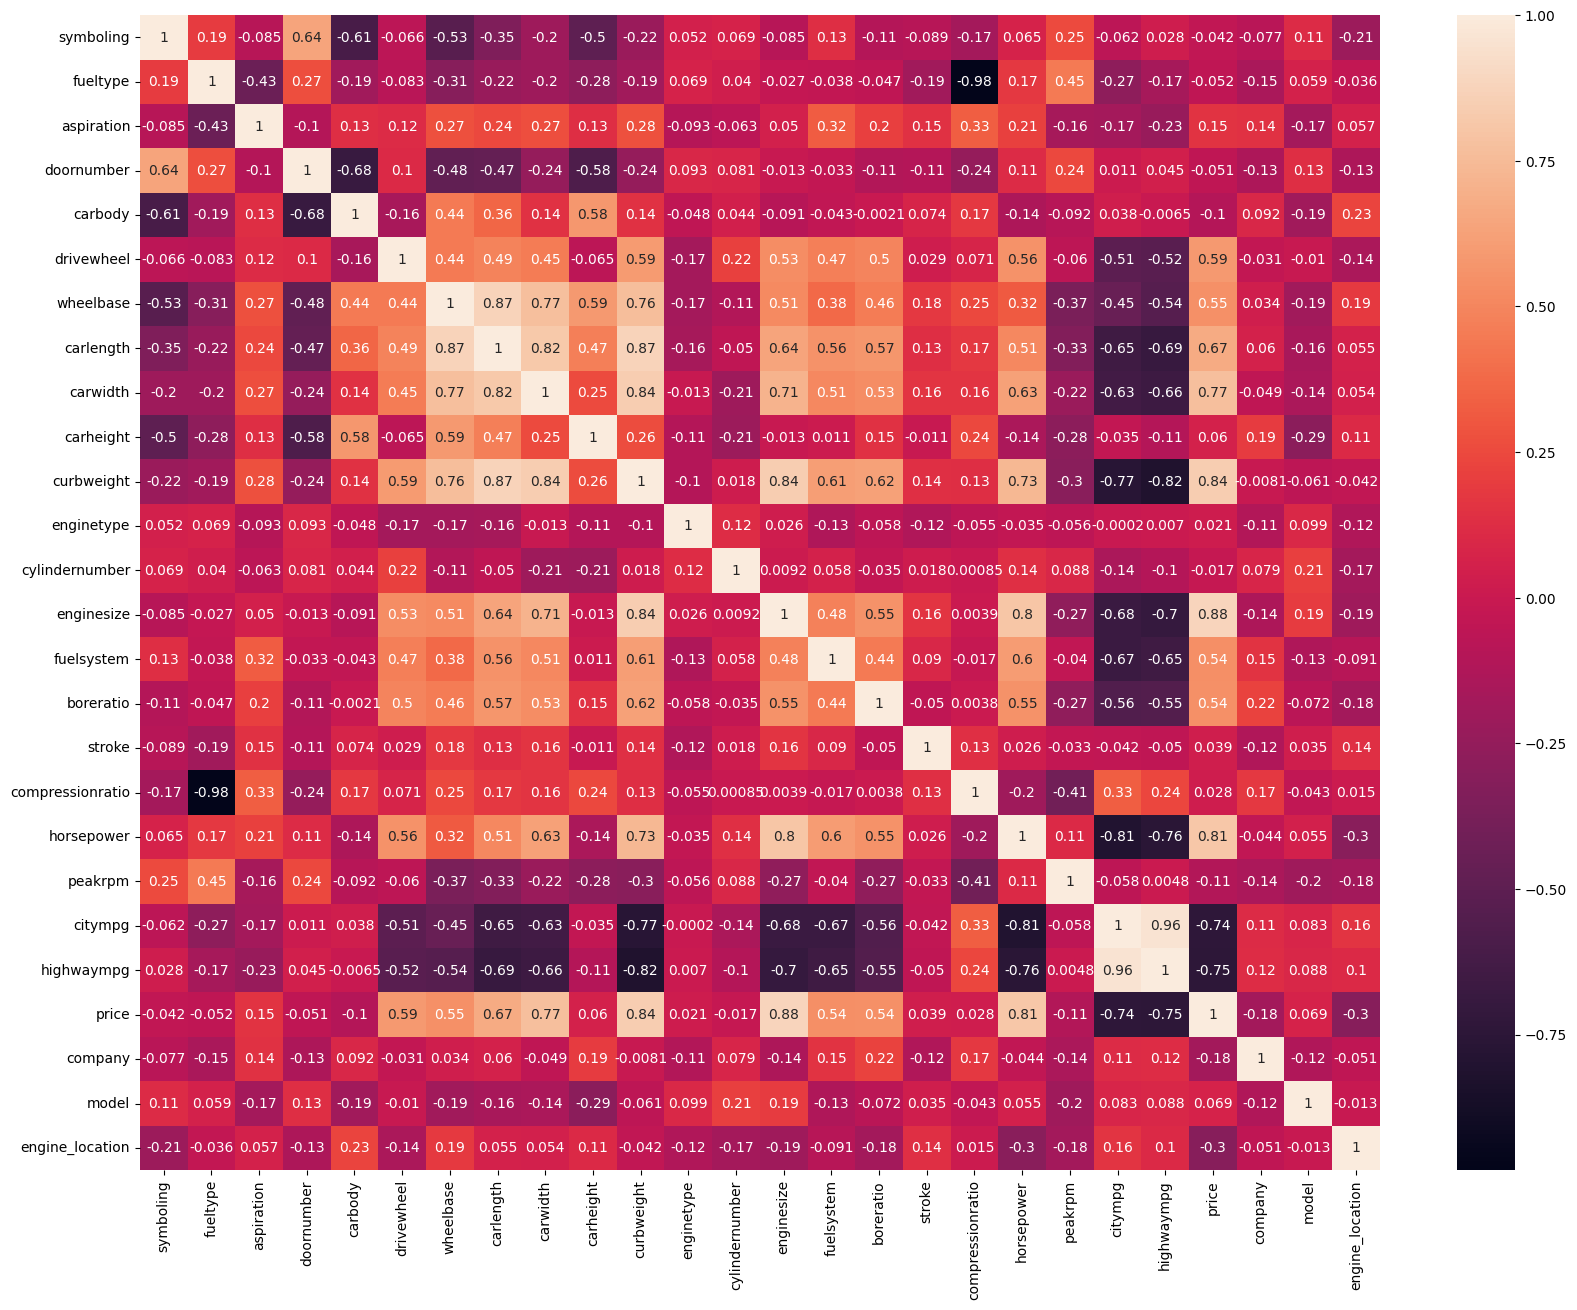

In [583]:
# Heat map
# For very high corr (0.9 or 1) drop one of the columns
corr = df_train.select_dtypes(include=np.number).corr()
plt.figure(figsize=(20, 15))
dataplot = sb.heatmap(corr, annot=True)
plt.show()

# Feature Extraction - Train

In [558]:
# Car name column

def split_carname_column(df_train, column_name):
    df_train[column_name] = df_train[column_name].astype(str)
    df_train[['company', 'model']] = df_train[column_name].str.split(' ', n=1, expand=True)
    return df_train

df_train = split_carname_column(df_train, 'CarName')
print(df_train[['CarName', 'company', 'model']].head())

              CarName  company       model
177    toyota mark ii   toyota     mark ii
75     mercury cougar  mercury      cougar
174  toyota celica gt   toyota   celica gt
31   honda civic cvcc    honda  civic cvcc
12             bmw x1      bmw          x1


In [559]:
# Engine location column

def encode_engine_location(df, column_name):
    df['engine_location'] = df[column_name].apply(lambda x: 1 if x == 'front' else 0)
    return df

df_train = encode_engine_location(df_train, 'enginelocation')
print(df_train[['enginelocation', 'engine_location']].head())

    enginelocation  engine_location
177          front                1
75           front                1
174          front                1
31           front                1
12           front                1


In [560]:
df_train.drop(columns=['CarName'], inplace=True)
df_train.drop(columns=['enginelocation'], inplace=True)

# Feature Extraction - Test

In [561]:
# Car name column

def split_carname_column(df_test, column_name):
    df_test[column_name] = df_test[column_name].astype(str)
    df_test[['company', 'model']] = df_test[column_name].str.split(' ', n=1, expand=True)
    return df_test

df_test = split_carname_column(df_test, 'CarName')
print(df_test[['CarName', 'company', 'model']].head())

                      CarName company               model
15                     bmw x4     bmw                  x4
9         audi 5000s (diesel)    audi      5000s (diesel)
100              nissan nv200  nissan               nv200
132                  saab 99e    saab                 99e
68   buick century luxus (sw)   buick  century luxus (sw)


In [562]:
# Engine location column

def encode_engine_location(df, column_name):
    df['engine_location'] = df[column_name].apply(lambda x: 1 if x == 'front' else 0)
    return df

df_test = encode_engine_location(df_test, 'enginelocation')
print(df_test[['enginelocation', 'engine_location']].head())

    enginelocation  engine_location
15           front                1
9            front                1
100          front                1
132          front                1
68           front                1


In [563]:
df_test.drop(columns=['CarName'], inplace=True)
df_test.drop(columns=['enginelocation'], inplace=True)

# Scaling

In [564]:
# from sklearn.preprocessing import MinMaxScaler
# # Scaling for columns except the target (Price) column
# numeric_columns = df_train.select_dtypes(np.number).columns
# for col in numeric_columns:
#     df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

# scaler = MinMaxScaler()
# df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

In [565]:
# # Scaling (transform only) for test df except the target (Price) column
# numeric_columns = df_test.select_dtypes(np.number).columns
# for col in numeric_columns:
#     df_test[col] = pd.to_numeric(df_test[col], errors='coerce')

# df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

In [566]:
categorical_train = df_train.select_dtypes(exclude = np.number).columns
categorical_train

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginetype', 'cylindernumber', 'fuelsystem', 'company', 'model'],
      dtype='object')

 # Label Encoding

In [567]:
classes = dict()
le = LabelEncoder()
for col in categorical_train:
    df_train[col]= le.fit_transform(df_train[col])
    classes[col] = le.classes_

In [568]:
categorical_test = df_test.select_dtypes(exclude = np.number).columns
categorical_test

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginetype', 'cylindernumber', 'fuelsystem', 'company', 'model'],
      dtype='object')

In [569]:
classes = dict()
le = LabelEncoder()
for col in categorical_test:
    df_test[col]= le.fit_transform(df_test[col])
    classes[col] = le.classes_

In [570]:
x_train, y_train = df_train.drop(columns = 'price').values, df_train['price'].values
x_test, y_test = df_test.drop(columns = 'price').values, df_test['price'].values

In [571]:
reg = LinearRegression() # ols
reg.fit(x_train, y_train)

LinearRegression()

In [572]:
y_pred = reg.predict(x_test)

In [573]:
y_pred[:10]

array([24686.61431593, 17761.39975353,  9648.56002398, 13917.42685287,
       25938.05088578,  6455.10847049,  7282.02831241,  6422.95930896,
       10500.64794534,  6878.29725015])

In [574]:
y_test[:10]

array([30760.   , 17859.167,  9549.   , 11850.   , 28248.   ,  7799.   ,
        7788.   ,  9258.   , 10198.   ,  7775.   ])

In [575]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.8270516133225047, 11982621.502773188, 2257.749530369768)

In [576]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)

In [577]:
r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)

(0.841669114663474, 10969857.00551461, 2239.4775750171552)